## Reading movie metadata

In [92]:
import pandas as pd
import numpy as np

metadata = pd.read_table("MovieSummaries/MovieSummaries/movie.metadata.tsv", header=None)

metadata.columns = [
    "Wikipedia_movie_ID",
    "Freebase_movie_ID",
    "Movie_name",
    "Movie_release_date",
    "Movie_box_office_revenue",
    "Movie_runtime",
    "Movie_languages", 
    "Movie_countxries",  
    "Movie_genres"     
]

metadata

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


## Checking types and Nans

In [122]:
metadata.isna().sum()

Wikipedia_movie_ID              0
Freebase_movie_ID               0
Movie_name                      0
Movie_release_date           6902
Movie_box_office_revenue    73340
Movie_runtime               20450
Movie_languages                 0
Movie_countries                 0
Movie_genres                    0
dtype: int64

In [73]:
metadata.dtypes

Wikipedia_movie_ID            int64
Freebase_movie_ID            object
Movie_name                   object
Movie_release_date           object
Movie_box_office_revenue    float64
Movie_runtime               float64
Movie_languages              object
Movie_countries              object
Movie_genres                 object
dtype: object

## Loading summaries

In [80]:
with open("MovieSummaries/MovieSummaries/plot_summaries.txt", "r", encoding="utf-8") as f:
    file = f.readlines()

data = [line.strip().split("\t", 1) for line in file]

summaries_df = pd.DataFrame(data, columns=["Wikipedia_movie_ID", "Movie_Summary"])

summaries_df['Wikipedia_movie_ID'] = summaries_df['Wikipedia_movie_ID'].astype("int")

In [ ]:
summaries_df.isna().sum()

## Merging datasets

In [82]:
final_df = metadata.merge(summaries_df, on="Wikipedia_movie_ID") 

In [126]:
final_df.isna().sum()

Wikipedia_movie_ID              0
Freebase_movie_ID               0
Movie_name                      0
Movie_release_date           2618
Movie_box_office_revenue    34619
Movie_runtime                6624
Movie_languages                 0
Movie_countries                 0
Movie_genres                    0
Movie_Summary                   0
dtype: int64

In [130]:
final_df["Movie_box_office_revenue"]

0        14010832.0
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
42202           NaN
42203           NaN
42204           NaN
42205           NaN
42206           NaN
Name: Movie_box_office_revenue, Length: 42207, dtype: float64

In [134]:
pd.DataFrame(np.unique(final_df.Movie_genres))               

,0
0,"{""/m/014dsx"": ""Travel"", ""/m/01z4y"": ""Comedy""}"
1,"{""/m/014dsx"": ""Travel"", ""/m/0219x_"": ""Indie"", ..."
2,"{""/m/014dsx"": ""Travel"", ""/m/0hj3n89"": ""Instrum..."
3,"{""/m/014dsx"": ""Travel"", ""/m/0jtdp"": ""Documenta..."
4,"{""/m/01585b"": ""Slasher""}"
...,...
17848,"{""/m/0vjs6"": ""Detective"", ""/m/03btsm8"": ""Actio..."
17849,"{""/m/0vjs6"": ""Detective"", ""/m/03k9fj"": ""Advent..."
17850,"{""/m/0vjs6"": ""Detective"", ""/m/04pbhw"": ""Superh..."
17851,"{""/m/0vjs6"": ""Detective"", ""/m/082gq"": ""War film""}"


## Processing movie genres

In [199]:
import json

final_df["Movie_genres"] = final_df["Movie_genres"].apply(lambda x: list(json.loads(x).values()))

## Now we look for keywords

In [257]:
keywords = ["Biodiversity", "CO2", "Global Warming", "Climate Change", "biodiversity"]
pattern = '|'.join(keywords)  

filtered_df = final_df[final_df['Movie_Summary'].str.contains(pattern, na=False, case=False)]

filtered_df["Movie_genres"]

556                                                                                                [Disaster, Thriller, Science Fiction, Action/Adventure]
1201                                                                                     [Thriller, Sci-Fi Horror, Science Fiction, Horror, Creature Film]
1536                                        [Social problem film, History, Experimental film, Drama, War film, Political cinema, Avant-garde, Documentary]
1908                                                                                                                                         [Documentary]
3526                                                                                     [Thriller, Crime Fiction, Indie, Drama, Suspense, Crime Thriller]
4081                                                                        [Parody, Doomsday film, Absurdism, Action/Adventure, Comedy, Disaster, Action]
4181                                                              [Sci

In [258]:
from collections import Counter
all_genres = [genre for sublist in filtered_df['Movie_genres'] for genre in sublist]
genre_counts = Counter(all_genres)
genre_counts

Counter({'Science Fiction': 15,
         'Thriller': 11,
         'Documentary': 11,
         'Drama': 10,
         'Horror': 8,
         'Comedy': 8,
         'Action': 8,
         'Adventure': 8,
         'Disaster': 6,
         'Action/Adventure': 5,
         'Short Film': 5,
         'Animation': 4,
         'Fantasy': 4,
         'Family Film': 4,
         'Indie': 3,
         'Sci-Fi Horror': 2,
         'History': 2,
         'Political cinema': 2,
         'Suspense': 2,
         'Parody': 2,
         'Doomsday film': 2,
         "Children's": 2,
         'Satire': 2,
         'Alien Film': 2,
         'Japanese Movies': 2,
         'Culture & Society': 2,
         'Black comedy': 2,
         'Television movie': 2,
         'Monster': 2,
         'Nature': 2,
         'B-movie': 2,
         'Natural disaster': 2,
         'Creature Film': 1,
         'Social problem film': 1,
         'Experimental film': 1,
         'War film': 1,
         'Avant-garde': 1,
         'Crime Fic

In [259]:
genre_counts = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True))

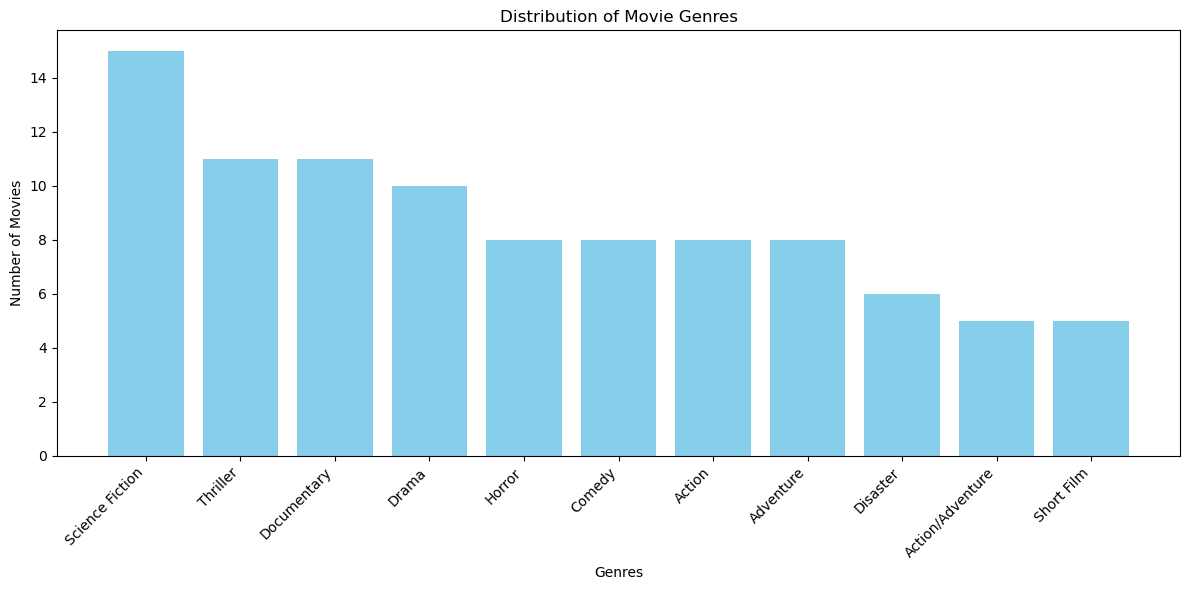

In [261]:
genre_counts_filtered = {genre: count for genre, count in genre_counts.items() if count >= 5}

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.bar(genre_counts_filtered.keys(), genre_counts_filtered.values(), color='skyblue')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [223]:
filtered_df.shape

(2273, 10)

In [275]:
from bs4 import BeautifulSoup
import requests
url = "https://unfccc.int/resource/cd_roms/na1/ghg_inventories/english/8_glossary/Glossary.htm"
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    print(soup.prettify())

<html style="height:100%">
 <head>
  <meta content="NOINDEX, NOFOLLOW" name="ROBOTS"/>
  <meta content="telephone=no" name="format-detection"/>
  <meta content="initial-scale=1.0" name="viewport"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
 </head>
 <body style="margin:0px;height:100%">
  <iframe frameborder="0" height="100%" id="main-iframe" marginheight="0px" marginwidth="0px" src="/_Incapsula_Resource?SWUDNSAI=31&amp;xinfo=5-14989499-0%202cNN%20RT%281730818284636%2069%29%20q%280%20-1%20-1%20-1%29%20r%280%20-1%29%20B12%284%2c315%2c0%29&amp;incident_id=9153000090084067918-63089539714974277&amp;edet=12&amp;cinfo=04000000&amp;rpinfo=0&amp;cts=CuF6SbK%2bHX%2fPbWqOfLJS7zTEB58y%2fbjVK%2brfm%2bEwywcSk%2bif2ABXWe6Bb%2fKnQp7B&amp;mth=GET" width="100%">
   Request unsuccessful. Incapsula incident ID: 9153000090084067918-63089539714974277
  </iframe>
 </body>
</html>



In [271]:

from bs4 import BeautifulSoup

# Step 1: Fetch the webpage


# Check if the request was successful
if response.status_code == 200:
    # Step 2: Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Step 3: Extract the relevant information
    # For example, extracting all definitions in the glossary
    glossary_terms = soup.find_all('dt')  # Typically, glossary terms are in <dt> tags
    glossary_definitions = soup.find_all('dd')  # Definitions are usually in <dd> tags

    # Step 4: Combine the terms and definitions
    glossary = {}
    for term, definition in zip(glossary_terms, glossary_definitions):
        glossary[term.text.strip()] = definition.text.strip()

    # Print or process the glossary dictionary
    for term, definition in glossary.items():
        print(f"{term}: {definition}")

else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")
